In [84]:
%matplotlib inline

In [85]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [86]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

In [87]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [89]:
duplicate_count = str(np.sum(np.array(data.duplicated())))
print("Duplicate data count: " + duplicate_count)

Duplicate data count: 240


In [90]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

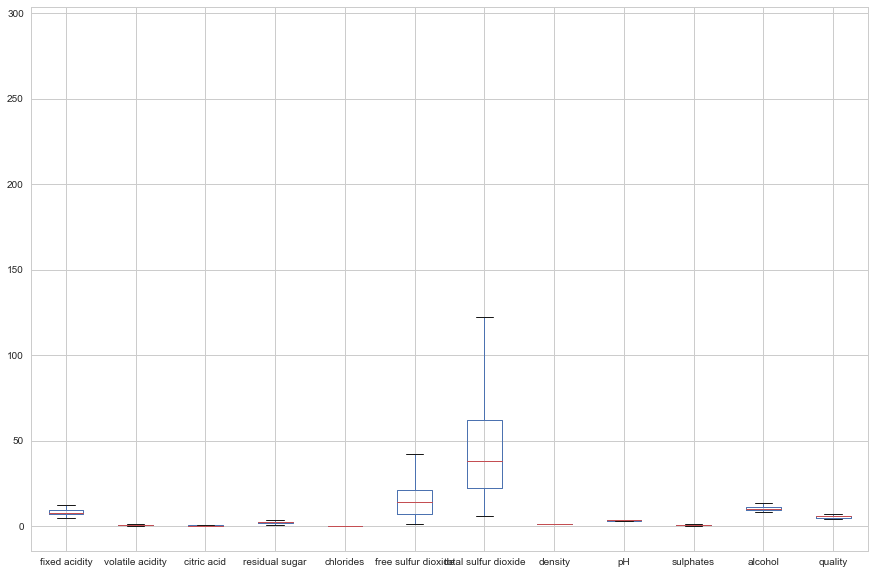

In [91]:
data.plot(kind='box', figsize=(15,10))
plt.show()

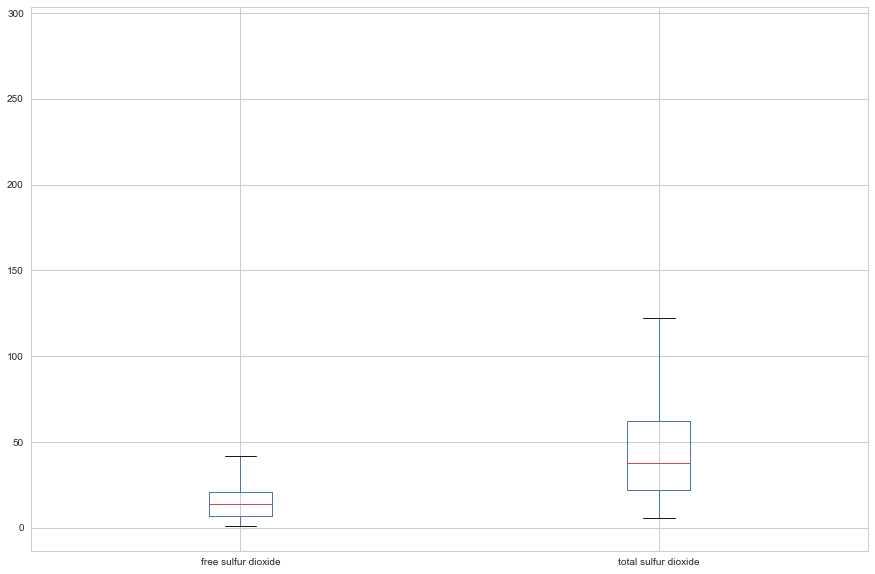

In [92]:
data[['free sulfur dioxide','total sulfur dioxide']].plot.box(figsize=(15,10))
plt.show()

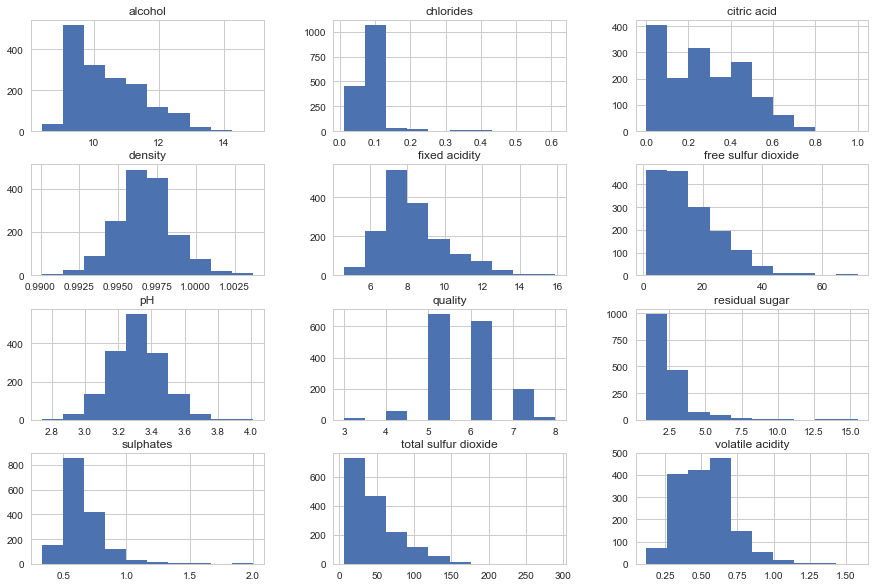

In [93]:
data.hist(figsize=(15,10))
plt.show()

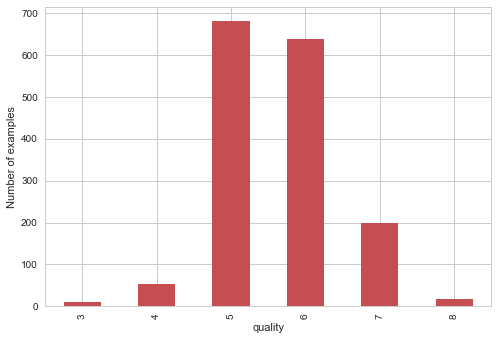

In [94]:
plt.xlabel("Quality")
plt.ylabel("Number of examples")
data.groupby('quality').size().plot.bar(color='r')
plt.show()

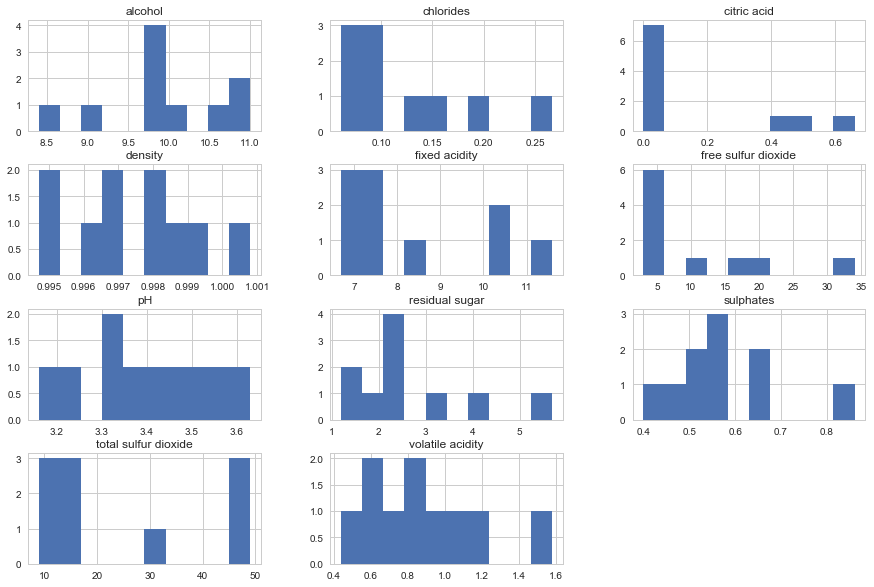

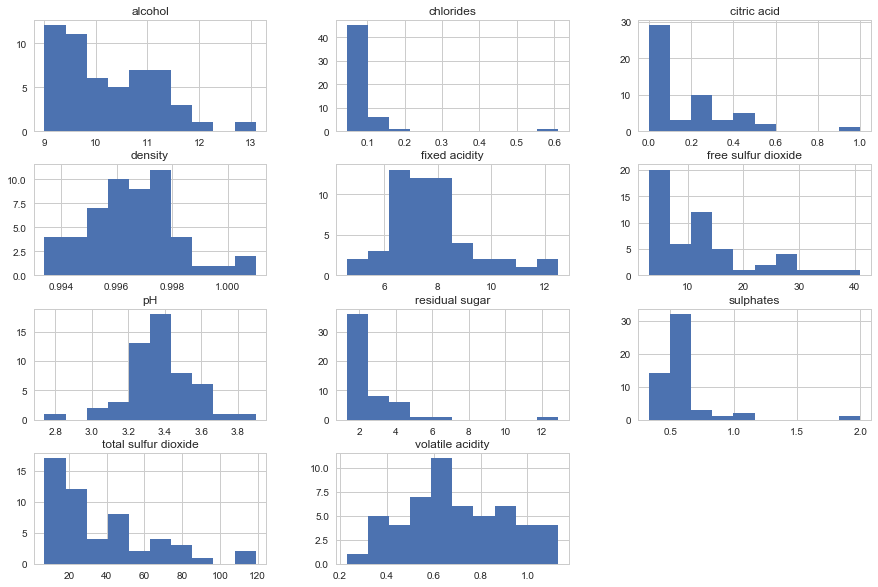

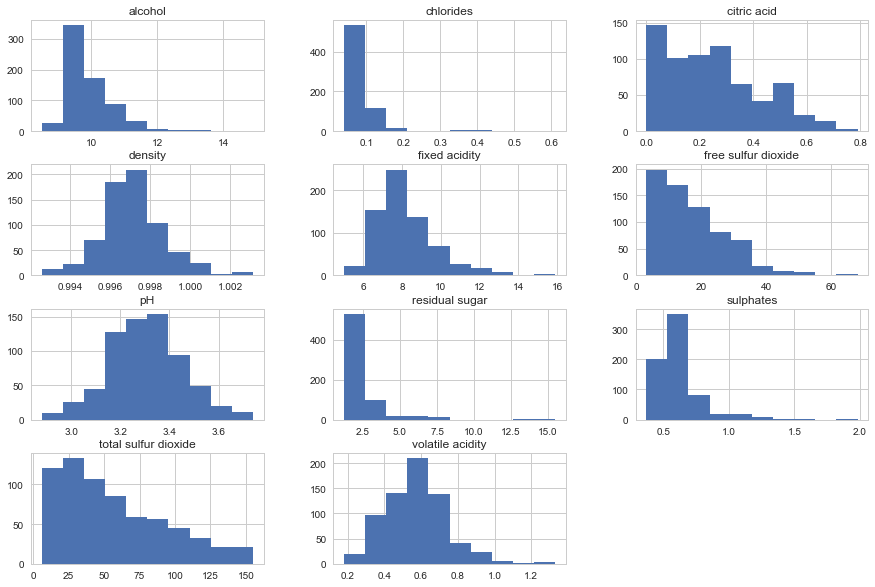

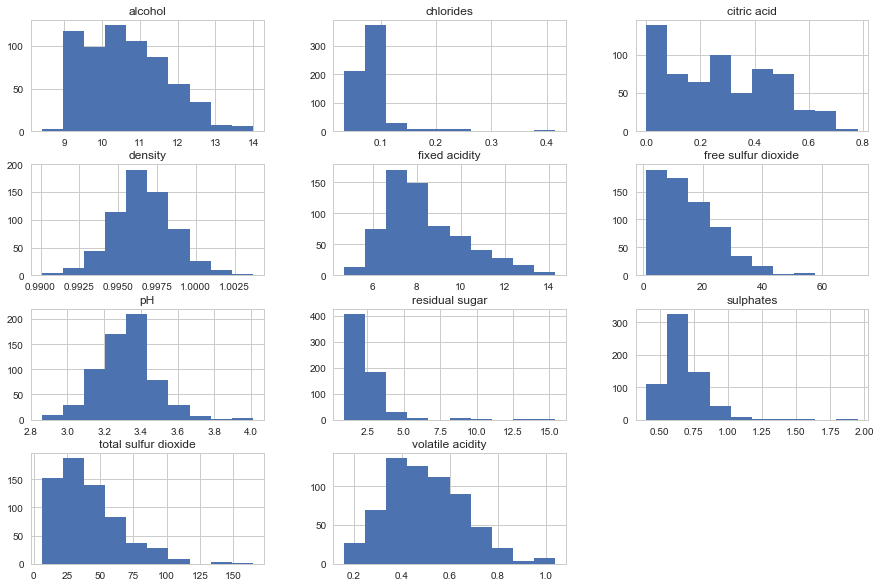

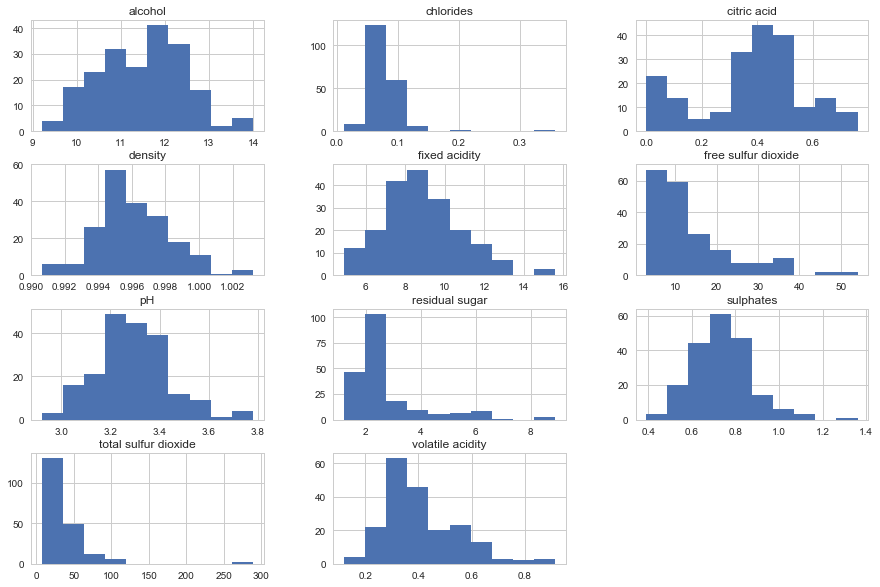

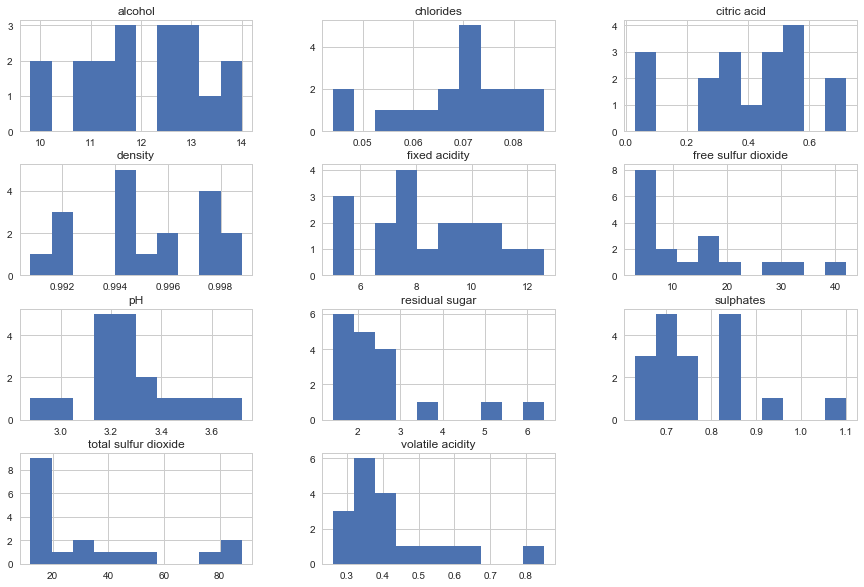

In [95]:
data.groupby('quality').hist(figsize=(15,10))
plt.show()

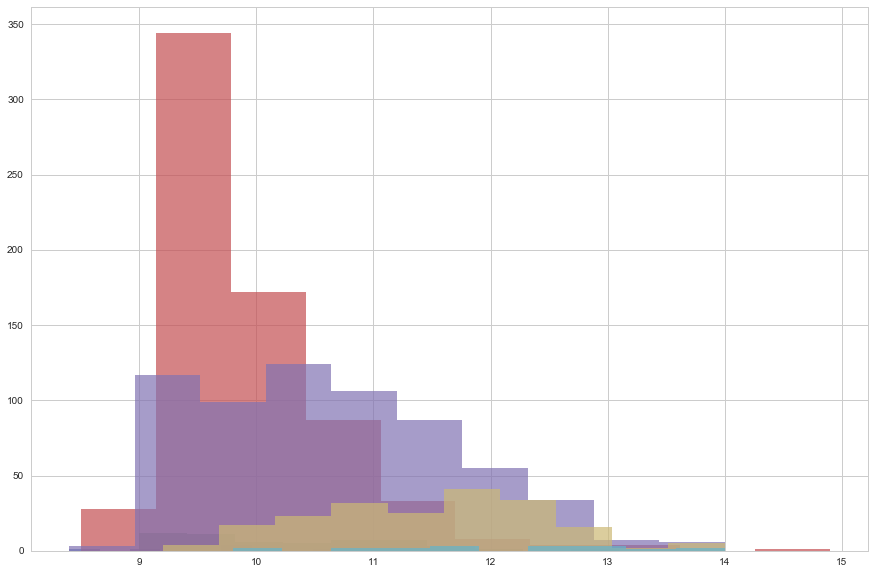

In [96]:
data.groupby('quality').alcohol.hist(alpha=0.7, figsize=(15,10))
plt.show()

In [ ]:
data.groupby('quality').describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [ ]:
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

In [ ]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Features Correlation Heatmap")
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

In [ ]:
corr